In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('citrus.csv') 
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [3]:
#label
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [4]:
# All data are numbers there is no null or missed values
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [5]:
print(df.describe())

           diameter        weight           red         green          blue
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean       9.975685    175.050792    153.847800     76.010600     11.363200
std        1.947844     29.212119     10.432954     11.708433      9.061275
min        2.960000     86.760000    115.000000     31.000000      2.000000
25%        8.460000    152.220000    147.000000     68.000000      2.000000
50%        9.980000    174.985000    154.000000     76.000000     10.000000
75%       11.480000    197.722500    161.000000     84.000000     17.000000
max       16.450000    261.510000    192.000000    116.000000     56.000000


<AxesSubplot:xlabel='name', ylabel='count'>

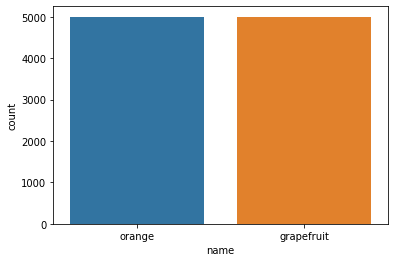

In [6]:
sns.countplot(x = "name", data = df)

In [7]:
features = df.drop(['name'], axis = 1)
labels = df['name']

In [8]:
# encode labels from names to numbers
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

In [9]:
# scale the features to [0-1] scale
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [10]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
features

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [13]:
X_train.shape

(7000, 5)

In [14]:
y_train.shape

(7000,)

In [15]:
 X_test.shape

(3000, 5)

In [16]:
y_test.shape

(3000,)

In [17]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [18]:
def compute_cost(X, y, w, b, lambda_= 1):
    m, n = X.shape
    cost = 0.
    
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m                                     
     

    return cost


In [19]:
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb += w[j]*X[i][j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw[j] += (f_wb - y[i])* X[i][j]
            
            
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    
    return dj_db, dj_dw

In [20]:
# Compute and display gradient with w initialized to zeroes
m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.0012857142857142856
dj_dw at initial w (zeros):[0.05493227787779274, 0.06294673615368908, -0.01960296846011134, -0.03596218487394953, 0.03928439153439175]


In [21]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    # number of training examples
    m = len(X)
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   
        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [22]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 200
alpha = 4

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.05   
Iteration   20: Cost     0.40   
Iteration   40: Cost     0.30   
Iteration   60: Cost     0.26   
Iteration   80: Cost     0.24   
Iteration  100: Cost     0.23   
Iteration  120: Cost     0.22   
Iteration  140: Cost     0.21   
Iteration  160: Cost     0.20   
Iteration  180: Cost     0.20   
Iteration  199: Cost     0.20   


In [23]:
def predict(X, w, b): 
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
    
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += w[j] * X[i][j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5
         
    return p

In [24]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.914286


In [25]:
#Compute accuracy on our training set
p = predict(X_test, w,b)
print('Test Accuracy: %f'%(np.mean(p == y_test) * 100))

Test Accuracy: 91.833333


In [26]:
#calculating precision and reall
precision = precision_score(y_test, p)
recall = recall_score(y_test, p)
 
print('Precision: ',precision)
print('Recall: ',recall)
 

Precision:  0.9170013386880856
Recall:  0.9188464118041583


In [27]:
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = (2*precision*recall)/(precision+recall)
    return f1_score

In [28]:
f1_score_tr = F1_score(y_test, p)
print(f1_score_tr)

0.9179229480737018


In [29]:
confusion_matrix(y_test, p)

array([[1385,  124],
       [ 121, 1370]], dtype=int64)